In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
f = open("ex2data1.txt")
data = [(line.split(",")[0],line.split(",")[1],line.split(",")[2][:-1]) for line in f]
x = [[float(d[0]),float(d[1])] for d in data]
y = [int(d[2]) for d in data]
m = len(y)
f.close()

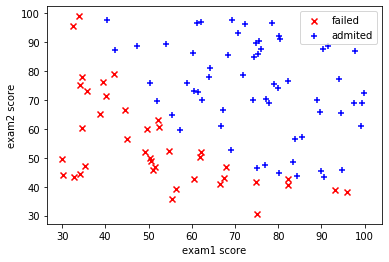

In [14]:
y = np.array(y)
x = np.array(x)
neg = np.where(y == 0)
pos = np.where(y == 1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(np.take(x[:,0],neg),np.take(x[:,1],neg) , c="r" ,marker = "x" , label = "failed")
plt.scatter(np.take(x[:,0],pos),np.take(x[:,1],pos) , c="b" ,marker = "+" , label = "admited")
plt.xlabel("exam1 score")
plt.ylabel("exam2 score")
plt.legend()
plt.show()

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(np.multiply(z,-1)))

In [0]:
m,n = x.shape
X = np.concatenate((np.ones((m,1)), x ),axis = 1 ) # Add a column of ones to x for bias

In [0]:
def costFunctionCrossEntropy(theta,X,y):
  J = 0
  theta = theta.T
  grad = np.zeros(theta.shape)
  m = len(y);  #number of training examples
  H = sigmoid(np.matmul(X,theta)).reshape(m,1)
  term1 = np.multiply(y.reshape(100,1), np.log(H))
  HEqual1 = np.where(H==1)
  H[HEqual1] = 0.9999999999999999 #otherwise costfunction penelize infinite
  term2 = np.multiply(1 - y.reshape(100,1) , np.log(1 - H))
  J = -1 * np.sum( term1 + term2  ) / m
  grad = np.matmul((H - y.reshape(100,1)).T , X) / m
  return J,grad

In [18]:
#  Initialize fitting parameters
theta = np.zeros((1,n+1))

# Compute and display initial cost and gradient
cost, grad =  costFunctionCrossEntropy(theta,X,y)
print(cost,grad)
#  Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24, 0.2, 0.2]])
cost, grad = costFunctionCrossEntropy(test_theta, X, y)
print(cost,grad)
test2_theta = np.array([[2,2,2]])
cost, grad = costFunctionCrossEntropy(test2_theta, X, y)
print(cost,grad)

0.6931471805599453 [[ -0.1        -12.00921659 -11.26284221]]
0.21833019382659774 [[0.04290299 2.56623412 2.64679737]]
14.694720227870839 [[ 0.4        20.81292044 21.84815684]]


In [19]:
import numpy as np
from scipy.optimize import fmin_bfgs
def rosen(theta):
  J , _ = costFunctionCrossEntropy(theta,X,y)
  return J

initial_theta = np.array([[0,0,0]])
rosen(initial_theta)
final_theta = fmin_bfgs(rosen,initial_theta ,maxiter=400)
print(final_theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 145
         Gradient evaluations: 29
[-25.16123289   0.20623085   0.20147081]


In [0]:
def predict(X):
  H = sigmoid(np.matmul(X,theta))
  return H

In [21]:
cost ,_ = costFunctionCrossEntropy(final_theta,X,y)
print(cost)

0.20349770159110825


28 96.22619251755562


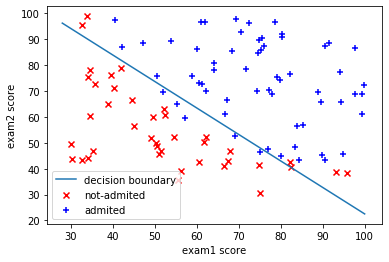

In [23]:
neg = np.where(y == 0)
pos = np.where(y == 1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(np.take(x[:,0],neg),np.take(x[:,1],neg) , c="r" ,marker = "x" , label = "not-admited")
plt.scatter(np.take(x[:,0],pos),np.take(x[:,1],pos) , c="b" ,marker = "+" , label = "admited")
plt.xlabel("exam1 score")
plt.ylabel("exam2 score")

x1 = int(min(x[:,1])-2)
x2 = int(max(x[:,1])+2)
y1 = (final_theta[0] + final_theta[1]*x1) /(-1 * final_theta[2])
y2 = (final_theta[0] + final_theta[1]*x2) /(-1 * final_theta[2])
print(x1,y1)
plt.plot([x1,x2], [y1,y2] ,label = "decision boundary")
plt.legend() 
plt.show()